CSV files have been successfully combined!


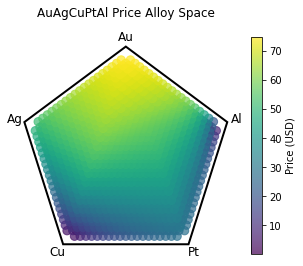

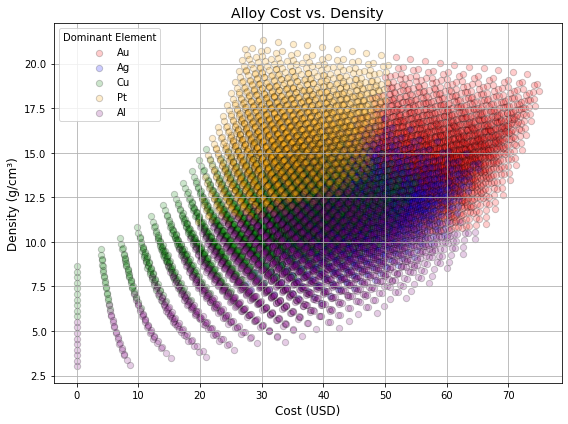

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
import os

csv_directory = 'CalcFiles/'
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]
dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv('combined_output.csv', index=False)
print("CSV files have been successfully combined!")

def barycentric_to_cartesian(barycentric_coords, vertices):
    return np.dot(barycentric_coords, vertices)

def generate_regular_pentagon(n, radius, center):
    angles = np.linspace(np.pi / 2, 2 * np.pi + np.pi / 2, n, endpoint=False)
    vertices = np.array([[center[0] + radius * np.cos(angle),
                          center[1] + radius * np.sin(angle)] for angle in angles])
    if n == 4:
        angles = np.linspace(np.pi / n, 2 * np.pi + np.pi / n, n, endpoint=False)
        vertices = np.array([[center[0] + radius * np.cos(angle),
                              center[1] + radius * np.sin(angle)] for angle in angles])
    return vertices

def plot_pentagon_with_barycentric_projection(Q, barycentric_coords):
    cartesian_coords = barycentric_to_cartesian(barycentric_coords, Q)
    return cartesian_coords

def auto_expand_polygon(vertices, points, margin_factor=1.1):
    min_x, min_y = np.min(points, axis=0)
    max_x, max_y = np.max(points, axis=0)
    centroid = np.mean(vertices, axis=0)
    max_distance = max(np.abs(vertices - centroid).max(), 
                       max_x - centroid[0], max_y - centroid[1], 
                       centroid[0] - min_x, centroid[1] - min_y)
    expanded_vertices = centroid + (vertices - centroid) * (margin_factor * max_distance / np.abs(vertices - centroid).max())

    return expanded_vertices


def calculate_alloy_cost(composition):
    elements = composition.split()
    atomic_fractions = {}

    for el in elements:
        element = ''.join(filter(str.isalpha, el))
        atomic_fraction = float(el[len(element):]) if len(el) > len(element) else 1.0
        if element in atomic_weights:
            atomic_fractions[element] = atomic_fraction
    weighted_values = {el: atomic_fractions[el] * atomic_weights[el] for el in atomic_fractions}
    total_weight = sum(weighted_values.values())
    weight_fractions = {el: weighted_values[el] / total_weight for el in atomic_fractions}
    cost_per_kg = sum(weight_fractions[el] * element_costs.get(el, 0) for el in weight_fractions)

    return cost_per_kg



df = pd.read_csv('combined_output.csv')
elements = ['Au','Ag','Cu', 'Pt', 'Al']
#elements = ['Au','Ag','Cu', 'Ni', 'Pt', 'Fe']

df1 = pd.DataFrame(df[elements])
df2 = df1.to_dict(orient='records')

compositions = df2
composition_strings = [
    " ".join(f"{elem}{frac:.4f}" for elem, frac in comp.items())
    for comp in compositions]

df1 = pd.read_excel('element_data.xlsx')
atomic_weights = pd.Series(df1['Atomic Mass'].values, index=df1['Element Symbol']).to_dict()
element_costs = pd.Series(df1['Price'].values, index=df1['Element Symbol']).to_dict()
composition_strings = pd.Series(composition_strings)
df["Price"] = composition_strings.apply(calculate_alloy_cost)
df["Price"] = df["Price"]/1000


#target = 'Density Avg'
target = 'Price'
# #target = 'HV 25C PRIOR'

n = len(elements)
Q = generate_regular_pentagon(n, radius=1, center=(0, 0))

df2 = plot_pentagon_with_barycentric_projection(Q, df[elements])

df['proj0'] = df2[:, 0]
df['proj1'] = df2[:, 1]
df = df.sort_values(by=target, ascending=True)

fig, ax = plt.subplots(figsize=(5,4))

plt.scatter(df['proj0'], df['proj1'], c=df[target], alpha=0.7, s=70,marker='o')
#hb = ax.hexbin(df['proj0'], df['proj1'], C=df[target], gridsize=25, mincnt=1)
for j, element in enumerate(elements):
    theta = np.arctan2(Q[j, 1], Q[j, 0])
    radius_adjustment = 0.2
    new_x = Q[j, 0] + radius_adjustment * np.cos(theta)
    new_y = Q[j, 1] + radius_adjustment * np.sin(theta)
    ax.text(new_x, new_y, element, fontsize=12, ha='center', va='center')

Q_expanded = auto_expand_polygon(Q, df[['proj0', 'proj1']].values, margin_factor=1.1)
polygon = Polygon(Q_expanded, closed=True, edgecolor='k', facecolor='none', linewidth=2)
ax.add_patch(polygon)

plt.colorbar(label='Price (USD)')
#plt.title(f'AuAgCu Price Alloy Space', pad=20)
plt.title(f'AuAgCuPtAl Price Alloy Space', pad=20)
#plt.tight_layout()
plt.axis('off')
plt.show()







import matplotlib.pyplot as plt

# Define elements and properties
elements = ['Au', 'Ag', 'Cu', 'Pt', 'Al']
x_property = 'Price'
y_property = 'Density Avg'

# Assign dominant element per row
df['Dominant Element'] = df[elements].idxmax(axis=1)

# Distinct, high-contrast colors
distinct_colors = {
    'Au': 'red',
    'Ag': 'blue',
    'Cu': 'green',
    'Pt': 'orange',
    'Al': 'purple'
}

# Plot
plt.figure(figsize=(8, 6))
for el in elements:
    subset = df[df['Dominant Element'] == el]
    plt.scatter(
        subset[x_property],
        subset[y_property],
        label=el,
        color=distinct_colors.get(el, 'gray'),
        edgecolor='black',
        alpha=0.2,  # Opacity here
        s=40
    )

plt.xlabel("Cost (USD)", fontsize=12)
plt.ylabel("Density (g/cm³)", fontsize=12)
plt.title("Alloy Cost vs. Density", fontsize=14)
plt.legend(title='Dominant Element')
plt.grid(True)
plt.tight_layout()
plt.show()


CSV files have been successfully combined!


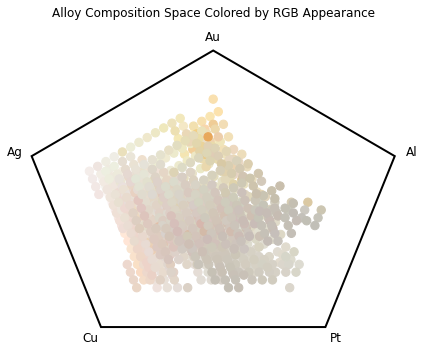

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Polygon
import os

# Combine all CSVs in directory
csv_directory = 'CalcFiles/'
csv_files = [file for file in os.listdir(csv_directory) if file.endswith('.csv')]
dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv('combined_output.csv', index=False)
print("CSV files have been successfully combined!")

# Geometry utilities
def barycentric_to_cartesian(barycentric_coords, vertices):
    return np.dot(barycentric_coords, vertices)

def generate_regular_pentagon(n, radius, center):
    angles = np.linspace(np.pi / 2, 2 * np.pi + np.pi / 2, n, endpoint=False)
    vertices = np.array([[center[0] + radius * np.cos(angle),
                          center[1] + radius * np.sin(angle)] for angle in angles])
    if n == 4:
        angles = np.linspace(np.pi / n, 2 * np.pi + np.pi / n, n, endpoint=False)
        vertices = np.array([[center[0] + radius * np.cos(angle),
                              center[1] + radius * np.sin(angle)] for angle in angles])
    return vertices

def plot_pentagon_with_barycentric_projection(Q, barycentric_coords):
    return barycentric_to_cartesian(barycentric_coords, Q)

def auto_expand_polygon(vertices, points, margin_factor=1.1):
    min_x, min_y = np.min(points, axis=0)
    max_x, max_y = np.max(points, axis=0)
    centroid = np.mean(vertices, axis=0)
    max_distance = max(np.abs(vertices - centroid).max(), 
                       max_x - centroid[0], max_y - centroid[1], 
                       centroid[0] - min_x, centroid[1] - min_y)
    expanded_vertices = centroid + (vertices - centroid) * (margin_factor * max_distance / np.abs(vertices - centroid).max())
    return expanded_vertices

# Load data
df = pd.read_csv('color_quinary.csv')

# Define your elements
elements = ['Au', 'Ag', 'Cu', 'Pt', 'Al']
n = len(elements)

# Convert compositions into list of dicts
df1 = pd.DataFrame(df[elements])
df2 = df1.to_dict(orient='records')
compositions = df2

# Calculate alloy cost
df1 = pd.read_excel('element_data.xlsx')
atomic_weights = pd.Series(df1['Atomic Mass'].values, index=df1['Element Symbol']).to_dict()
element_costs = pd.Series(df1['Price'].values, index=df1['Element Symbol']).to_dict()

composition_strings = [
    " ".join(f"{elem}{frac:.4f}" for elem, frac in comp.items())
    for comp in compositions
]
df["Price"] = pd.Series(composition_strings).apply(lambda composition: calculate_alloy_cost(composition) / 1000)

def calculate_alloy_cost(composition):
    elements = composition.split()
    atomic_fractions = {}
    for el in elements:
        element = ''.join(filter(str.isalpha, el))
        atomic_fraction = float(el[len(element):]) if len(el) > len(element) else 1.0
        if element in atomic_weights:
            atomic_fractions[element] = atomic_fraction
    weighted_values = {el: atomic_fractions[el] * atomic_weights[el] for el in atomic_fractions}
    total_weight = sum(weighted_values.values())
    weight_fractions = {el: weighted_values[el] / total_weight for el in atomic_fractions}
    cost_per_kg = sum(weight_fractions[el] * element_costs.get(el, 0) for el in weight_fractions)
    return cost_per_kg

# Generate pentagon and project data
Q = generate_regular_pentagon(n, radius=1, center=(0, 0))
df2 = plot_pentagon_with_barycentric_projection(Q, df[elements])
df['proj0'] = df2[:, 0]
df['proj1'] = df2[:, 1]

# Normalize RGB to [0, 1] and assign as color
df['color'] = df.apply(lambda row: (row['R'] / 255, row['G'] / 255, row['B'] / 255), axis=1)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(df['proj0'], df['proj1'], c=df['color'], s=70, marker='o')

# Label the element corners
for j, element in enumerate(elements):
    theta = np.arctan2(Q[j, 1], Q[j, 0])
    new_x = Q[j, 0] + 0.2 * np.cos(theta)
    new_y = Q[j, 1] + 0.2 * np.sin(theta)
    ax.text(new_x, new_y, element, fontsize=12, ha='center', va='center')

# Draw pentagon boundary
Q_expanded = auto_expand_polygon(Q, df[['proj0', 'proj1']].values, margin_factor=1.1)
polygon = Polygon(Q_expanded, closed=True, edgecolor='k', facecolor='none', linewidth=2)
ax.add_patch(polygon)

# Final plot settings
plt.title('Alloy Composition Space Colored by RGB Appearance', pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()




Trial 0
Initial candidates (from database): tensor([[0.0896, 0.2827, 0.9294],
        [0.0278, 0.0482, 0.9765]])

Initial comparison between two random colors:


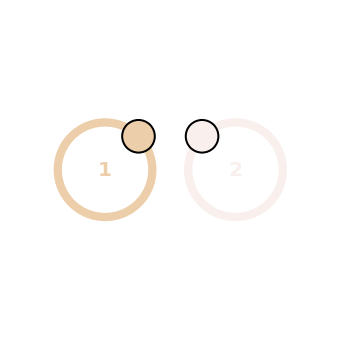


Compare the two color candidates visually:


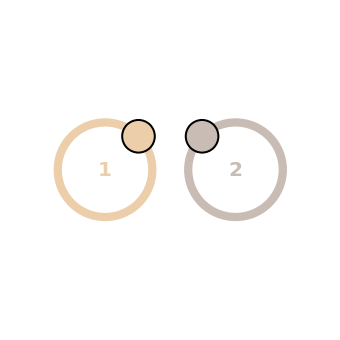


Compare the two color candidates visually:


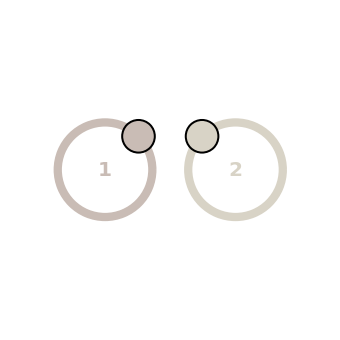


Compare the two color candidates visually:


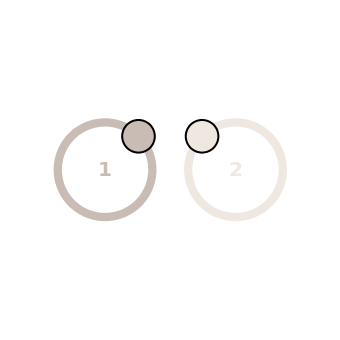


Compare the two color candidates visually:


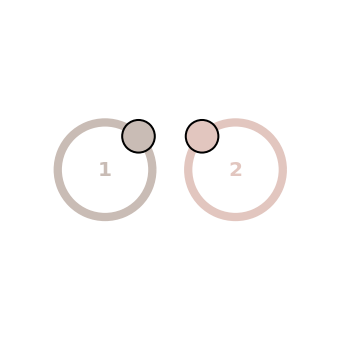


Compare the two color candidates visually:


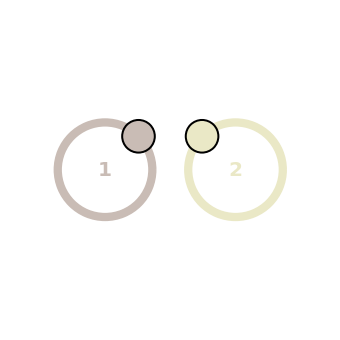


Compare the two color candidates visually:


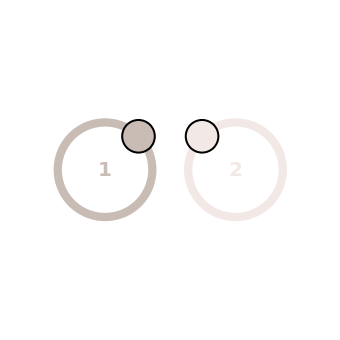


Compare the two color candidates visually:


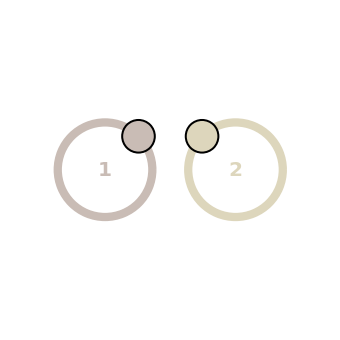


Compare the two color candidates visually:


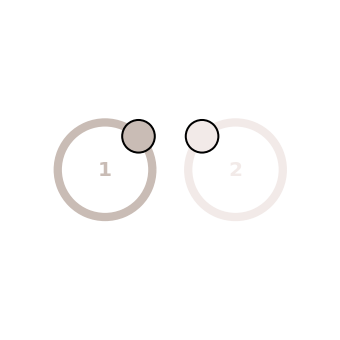


Compare the two color candidates visually:


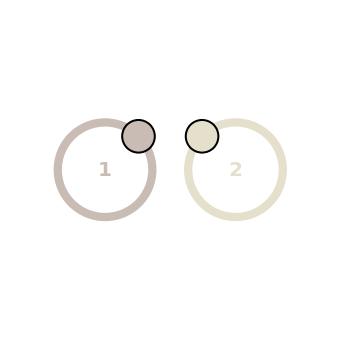


Compare the two color candidates visually:


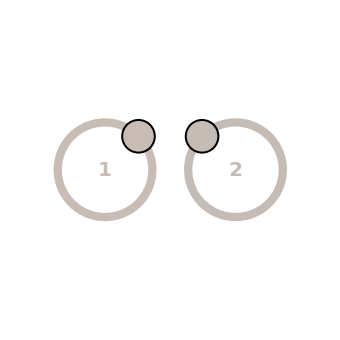


Compare the two color candidates visually:


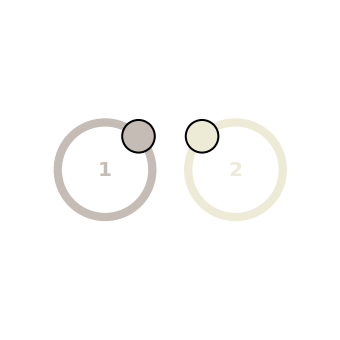


Compare the two color candidates visually:


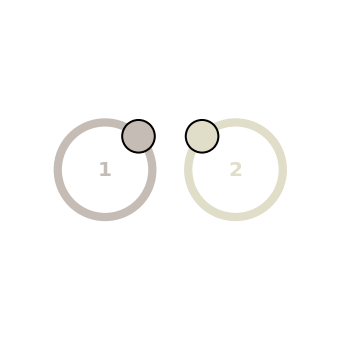


Compare the two color candidates visually:


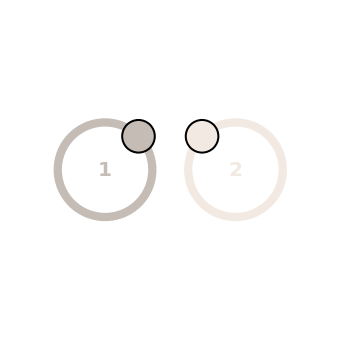


Compare the two color candidates visually:


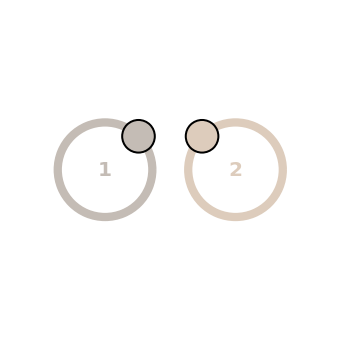


Compare the two color candidates visually:


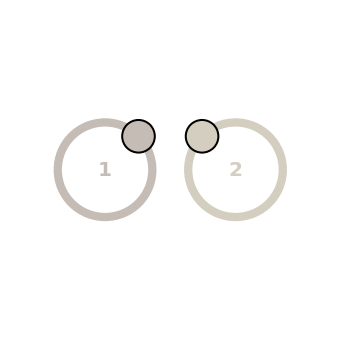


Compare the two color candidates visually:


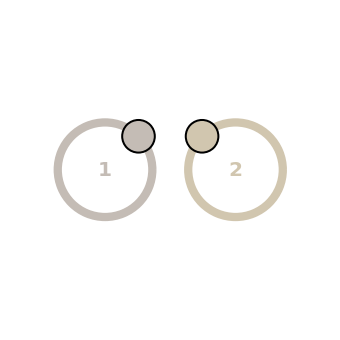


Compare the two color candidates visually:


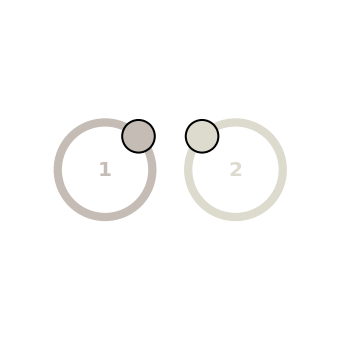


Compare the two color candidates visually:


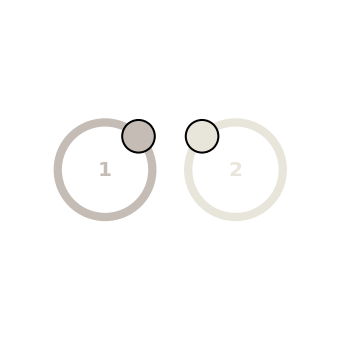


Compare the two color candidates visually:


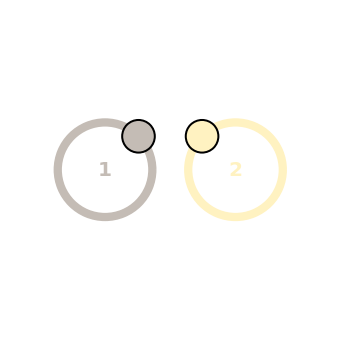


Compare the two color candidates visually:


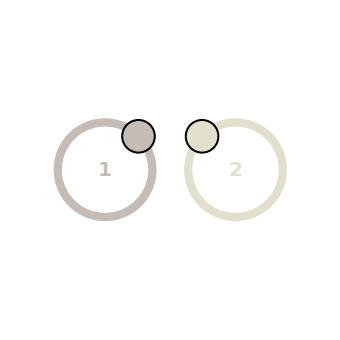

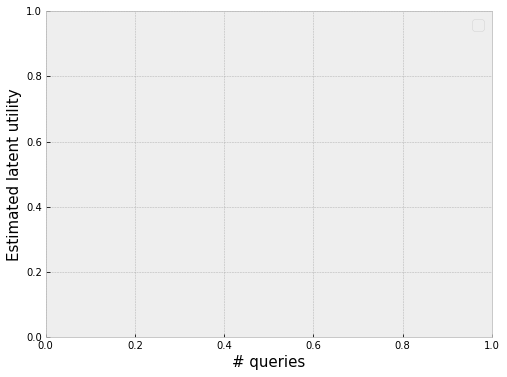


Best ring color found:
Candidate 1:
   HSV: (0.08, 0.08, 0.77)
   RGB: (0.77, 0.74, 0.71) -> (196, 188, 181)
   Hex: #C4BCB5
   (Converted HSV from RGB): (28.0°, 7.7%, 76.9%)


In [18]:
import numpy as np
import torch
import pandas as pd
import gpytorch
import botorch
import random
from botorch.models.pairwise_gp import PairwiseGP, PairwiseLaplaceMarginalLogLikelihood
from botorch.fit import fit_gpytorch_mll
from botorch.optim import optimize_acqf
from botorch.exceptions.warnings import OptimizationWarning

from botorch.acquisition.monte_carlo import qNoisyExpectedImprovement
from botorch.acquisition.analytic import UpperConfidenceBound

from torch.quasirandom import SobolEngine
from botorch.generation import MaxPosteriorSampling

from itertools import combinations

import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
import colorsys
import warnings
warnings.simplefilter("ignore")

plt.style.use("bmh")
plt.rcParams["figure.figsize"] = (8, 6)

warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=OptimizationWarning)

# -------------------------------
# Define the constrained (metallic) design space in HSV
# -------------------------------
# We reparameterize using HSV:
#   - Hue: 0 to 1 (full circle)
#   - Saturation: kept moderate (e.g., 0.2 to 0.6)
#   - Value (brightness): high (e.g., 0.7 to 1.0)
hsv_bounds = torch.tensor([[0.0, 0.2, 0.7], [1.0, 0.6, 1.0]], dtype=torch.float)

# -------------------------------
# Helper functions for conversion
# -------------------------------
def hsv_to_rgb_tensor(hsv):
    """
    Convert an HSV tensor (shape (3,)) with values in [0,1]
    to a tensor of RGB values (also in [0,1]).
    """
    h, s, v = hsv.tolist()
    r, g, b = colorsys.hsv_to_rgb(h, s, v)
    return torch.tensor([r, g, b])

def rgb_to_hsv_tensor(rgb):
    """
    Convert an RGB tensor (shape (3,)) with values in [0,1]
    to a tensor of HSV values (also in [0,1]).
    """
    r, g, b = rgb.tolist()
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    return torch.tensor([h, s, v])

def rgb_to_hex(r, g, b):
    """Convert RGB values in [0,1] to a Hex color code."""
    return '#{:02X}{:02X}{:02X}'.format(int(r*255), int(g*255), int(b*255))

def display_candidate(x, candidate_number):
    """
    (Legacy function) Display candidate details as text.
    The candidate x is assumed to be in HSV; we convert to RGB.
    """
    rgb = hsv_to_rgb_tensor(x)
    r, g, b = rgb.tolist()
    hex_color = rgb_to_hex(r, g, b)
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    h_deg = h * 360
    s_pct = s * 100
    v_pct = v * 100
    print(f"Candidate {candidate_number}:")
    print(f"   HSV: ({x[0]:.2f}, {x[1]:.2f}, {x[2]:.2f})")
    print(f"   RGB: ({r:.2f}, {g:.2f}, {b:.2f}) -> ({int(r*255)}, {int(g*255)}, {int(b*255)})")
    print(f"   Hex: {hex_color}")
    print(f"   (Converted HSV from RGB): ({h_deg:.1f}°, {s_pct:.1f}%, {v_pct:.1f}%)")

# -------------------------------
# Visual display: Show ring choices given candidate HSV values
# -------------------------------
def display_ring_choices(candidate1, candidate2):
    """
    Display two ring candidates visually.
    Each candidate is a tensor of shape (3,) in HSV. We convert to RGB for drawing.
    """
    # Convert candidate HSV to RGB
    color1 = tuple(hsv_to_rgb_tensor(candidate1).tolist())
    color2 = tuple(hsv_to_rgb_tensor(candidate2).tolist())
    colors = [color1, color2]
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(6,6))
    
    # Define parameters for the rings with more space between them
    center1 = (0.3, 0.5)
    center2 = (0.7, 0.5)
    radius = 0.15  # Outer radius of each ring
    width = 0.01   # Thickness of the ring
    
    # Draw hollow rings using Wedge (annuli with facecolor 'none')
    ring1 = Wedge(center=center1, r=radius, theta1=0, theta2=360,
                  width=width, edgecolor=colors[0], facecolor='none', lw=5)
    ring2 = Wedge(center=center2, r=radius, theta1=0, theta2=360,
                  width=width, edgecolor=colors[1], facecolor='none', lw=5)
    ax.add_patch(ring1)
    ax.add_patch(ring2)
    
    # Function to compute a point on the ring's midline (for gemstone placement)
    def gem_position(center, mid_radius, angle_rad):
        return (center[0] + mid_radius * np.cos(angle_rad),
                center[1] + mid_radius * np.sin(angle_rad))
    
    # The gemstone is placed along the midline (outer radius minus half the width)
    mid_radius = radius - width / 2
    gem_angle1 = np.pi / 4      # 45° for first ring
    gem_angle2 = 3 * np.pi / 4  # 135° for second ring
    
    gem_center1 = gem_position(center1, mid_radius, gem_angle1)
    gem_center2 = gem_position(center2, mid_radius, gem_angle2)
    
    gem_radius = 0.05  # Big gemstone size
    
    # Create gemstone patches with the candidate colors
    gem1 = Circle(gem_center1, gem_radius, color=colors[0], ec='black', lw=2)
    gem2 = Circle(gem_center2, gem_radius, color=colors[1], ec='black', lw=2)
    ax.add_patch(gem1)
    ax.add_patch(gem2)
    
    # Add text labels "1" and "2" inside the rings (with a white background for clarity)
    bg1 = Circle(center1, 0.03, color='white')
    bg2 = Circle(center2, 0.03, color='white')
    ax.add_patch(bg1)
    ax.add_patch(bg2)
    
    ax.text(center1[0], center1[1], '1', ha='center', va='center', fontsize=20,
            color=colors[0], fontweight='bold')
    ax.text(center2[0], center2[1], '2', ha='center', va='center', fontsize=20,
            color=colors[1], fontweight='bold')
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.show()

# -------------------------------
# Update observe_and_append_data for visual ring candidates (working in HSV)
# -------------------------------
def observe_and_append_data(x_next, x_train, comp_train, tol=1e-3):
    """
    x_next: a 2x3 tensor (each row is a candidate color in HSV).
    Instead of printing only numeric values, show the candidate rings visually.
    The user is then asked to choose which ring color they prefer.
    The function appends any new candidates to the training set.
    """
    x_next = x_next.to(x_train)
    
    print("\nCompare the two color candidates visually:")
    display_ring_choices(x_next[0], x_next[1])
    
    choice = input("Which ring color do you prefer? (Enter 1 or 2): ").strip()
    if choice == "1":
        comp_next = torch.tensor([[0, 1]]).long()
    elif choice == "2":
        comp_next = torch.tensor([[1, 0]]).long()
    else:
        print("Invalid input! Defaulting to option 1.")
        comp_next = torch.tensor([[0, 1]]).long()

    n = x_train.shape[0]
    new_x_train = x_train.clone()
    new_comp_next = comp_next.clone() + n
    n_dups = 0

    # Check first candidate for duplication.
    dup_ind = torch.where(torch.all(torch.isclose(x_train, x_next[0], atol=tol), dim=1))[0]
    if dup_ind.nelement() == 0:
        new_x_train = torch.cat([x_train, x_next[0].unsqueeze(0)], dim=0)
    else:
        new_comp_next = torch.where(new_comp_next == n, dup_ind, new_comp_next - 1)
        n_dups += 1

    # Check second candidate.
    dup_ind = torch.where(torch.all(torch.isclose(new_x_train, x_next[1], atol=tol), dim=1))[0]
    if dup_ind.nelement() == 0:
        new_x_train = torch.cat([new_x_train, x_next[1].unsqueeze(0)], dim=0)
    else:
        new_comp_next = torch.where(new_comp_next == n + 1 - n_dups, dup_ind, new_comp_next)
    
    new_comp_train = torch.cat([comp_train, new_comp_next], dim=0)
    return new_x_train, new_comp_train

# -------------------------------
# Preference learning experiment setup
# -------------------------------
"""
num_queries = 20
num_repeats = 1

# Choose strategy: "RANDOM", "EI", or "UCB"
strategy = "random"
strategy = strategy.upper()

# We'll record the incumbent’s (GP-predicted latent) utility at each query.
incumbents = torch.zeros((num_repeats, num_queries))

for trial in range(num_repeats):
    print("\nTrial", trial)
    torch.manual_seed(trial)
    np.random.seed(trial)
    
    # Initialize with 2 random color candidates in the HSV space
    train_x = hsv_bounds[0] + (hsv_bounds[1] - hsv_bounds[0]) * torch.rand(2, 3)
    """

num_queries = 20
num_repeats = 1

# Choose strategy: "RANDOM", "EI", or "UCB"
strategy = "random"
strategy = strategy.upper()

def rgb_to_hsv_tensor(rgb):
    r, g, b = rgb.tolist()
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    return torch.tensor([h, s, v])

# Load the RGB values
df = pd.read_csv("color_quinary.csv")  # assumes columns 'R', 'G', 'B'

# Normalize RGB values to [0,1] if they are in 0-255 range
if df[['R', 'G', 'B']].max().max() > 1:
    df[['R', 'G', 'B']] = df[['R', 'G', 'B']] / 255.0

hsv_values = df[['R', 'G', 'B']].apply(
    lambda row: rgb_to_hsv_tensor(torch.tensor(row.values)).tolist(),
    axis=1
)

# Now it's safe to turn into a DataFrame
df[['H', 'S', 'V']] = pd.DataFrame(hsv_values.tolist(), index=df.index)

# Finally, convert to a torch tensor
color_database = torch.tensor(df[['H', 'S', 'V']].values, dtype=torch.float32)


# We'll record the incumbent’s (GP-predicted latent) utility at each query.
incumbents = torch.zeros((num_repeats, num_queries))

for trial in range(num_repeats):
    print("\nTrial", trial)
    torch.manual_seed(trial)
    np.random.seed(trial)
    
    # Instead of random HSV, sample 2 colors from your color database
    indices = torch.randperm(color_database.size(0))[:2]
    train_x = color_database[indices]

    print("Initial candidates (from database):", train_x)

    # Ask the user for an initial visual comparison between the two random candidates.
    print("\nInitial comparison between two random colors:")
    display_ring_choices(train_x[0], train_x[1])
    comp_choice = input("Which ring color do you prefer as the initial candidate? (Enter 1 or 2): ").strip()
    if comp_choice == "1":
        train_comp = torch.tensor([[0, 1]]).long()
    elif comp_choice == "2":
        train_comp = torch.tensor([[1, 0]]).long()
    else:
        print("Invalid input! Defaulting to option 1.")
        train_comp = torch.tensor([[0, 1]]).long()
    
    # Keep track of available candidates
    all_indices = set(range(color_database.size(0)))
    used_indices = set(indices.tolist())  # The 2 initial colors
    available_indices = list(all_indices - used_indices)

    # During each query:
    for i in range(num_queries):
        # Fit the model
        model = PairwiseGP(train_x, train_comp)
        mll = PairwiseLaplaceMarginalLogLikelihood(model.likelihood, model)
        fit_gpytorch_mll(mll)

        # Get posterior utility
        with torch.no_grad():
            posterior = model.posterior(train_x)
            latent_means = posterior.mean.squeeze()
        incumbent_ind = latent_means.argmax()
        incumbents[trial, i] = latent_means[incumbent_ind]

        # --- Select challenger from database ---
        candidate_pool = color_database[available_indices]

        if strategy == "RANDOM":
            challenger_idx = random.choice(available_indices)
            challenger = color_database[challenger_idx].unsqueeze(0)

        elif strategy == "EI":
            policy = qNoisyExpectedImprovement(model, train_x)
            # Optimize acquisition over candidates only
            acq_values = policy(candidate_pool.unsqueeze(1)).squeeze()
            challenger_rel_idx = torch.argmax(acq_values).item()
            challenger_idx = available_indices[challenger_rel_idx]
            challenger = color_database[challenger_idx].unsqueeze(0)

        elif strategy == "UCB":
            policy = UpperConfidenceBound(model, beta=2)
            acq_values = policy(candidate_pool).squeeze()
            challenger_rel_idx = torch.argmax(acq_values).item()
            challenger_idx = available_indices[challenger_rel_idx]
            challenger = color_database[challenger_idx].unsqueeze(0)

        else:
            # fallback
            challenger_idx = random.choice(available_indices)
            challenger = color_database[challenger_idx].unsqueeze(0)

        # Update used/available indices
        used_indices.add(challenger_idx)
        available_indices = list(all_indices - used_indices)

        
        # Form the pair: current incumbent and the challenger.
        next_x = torch.vstack([train_x[incumbent_ind, :], challenger])
        
        # Prompt the user to compare the two candidates visually and update the training set.
        train_x, train_comp = observe_and_append_data(next_x, train_x, train_comp)

# Save the incumbent (latent utility) evolution.
#torch.save(incumbents, f"./forrester/{strategy}.pth")

# -------------------------------
# Plot progress
# -------------------------------
queries = torch.arange(num_queries)

def show_agg_progress(path, name, linestyle="solid"):
    def ci(y):
        return 2 * y.std(axis=0) / np.sqrt(num_repeats)
    incumbents_data = torch.load(path)
    avg_incumbent = incumbents_data.mean(axis=0)
    ci_incumbent = ci(incumbents_data)
    plt.plot(queries, avg_incumbent, linestyle, label=name)
    plt.fill_between(queries, avg_incumbent + ci_incumbent, avg_incumbent - ci_incumbent, alpha=0.3)

# These lines assume you have saved results for each strategy.
#show_agg_progress(f"./forrester/EI.pth", "EI", "-")
#show_agg_progress(f"./forrester/UCB.pth", "UCB (β=2)", "--")
#show_agg_progress(f"./forrester/RANDOM.pth", "Random", "-.")

plt.xlabel("# queries", fontsize=15)
plt.ylabel("Estimated latent utility", fontsize=15)
plt.legend(fontsize=15)
plt.show()

# -------------------------------
# Display the final best ring color found (convert HSV to RGB for display)
# -------------------------------
model = PairwiseGP(train_x, train_comp)
mll = PairwiseLaplaceMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_mll(mll)
posterior = model.posterior(train_x)
latent_means = posterior.mean.squeeze()
best_ind = latent_means.argmax()

best_color = train_x[best_ind]
print("\nBest ring color found:")
display_candidate(best_color, candidate_number=1)
